## All of the following for Topic Modelling is my own original implementation + optimization, especially Non-Negative Matrix Factorization

## I optimized my Non-Negative Matrix Factorization code with; Clever Tricks(such as reducing matrix multiplications to updating only some columns or rows, sometimes only a few elements. This is a huge improvement when you think that we have 65 million entries at our matrix and doing a matrix multiplication over this would be a computational nightmare), Numpy and Numba(Machine Code Compilation) and made it **1920x** faster

## Task#1-Non Negative Matrix Factorization : **90%** Accuracy over **all** articles(~22000 articles)

## Task#1

In [ ]:
import pandas as pd
import numpy as np
from numba import njit
import matplotlib.pyplot as plt
import zipfile

In [ ]:
def concat(*args):
  l3 = []
  for l in args:
    for e in l:
      l3.append(e)
  return l3

In [ ]:
!wget https://github.com/alperkaya0/topic-modelling/raw/main/BBC%20News%20Summary.zip

--2023-12-24 11:29:37--  https://github.com/alperkaya0/topic-modelling/raw/main/BBC%20News%20Summary.zip
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alperkaya0/topic-modelling/main/BBC%20News%20Summary.zip [following]
--2023-12-24 11:29:38--  https://raw.githubusercontent.com/alperkaya0/topic-modelling/main/BBC%20News%20Summary.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4358815 (4.2M) [application/zip]
Saving to: ‘BBC News Summary.zip’

BBC News Summary.zi 100%[===================>]   4.16M  --.-KB/s    in 0.02s   

2023-12-24 11:29:39 (244 MB/s) - ‘BBC News Summary.zip’ saved [

In [ ]:
archive = zipfile.ZipFile('BBC News Summary.zip', 'r')

In [ ]:
print('\n'.join(concat(archive.namelist()[:10], archive.namelist()[4450:])))

NewsArticles/
NewsArticles/b_001.txt
NewsArticles/b_002.txt
NewsArticles/b_003.txt
NewsArticles/b_004.txt
NewsArticles/b_005.txt
NewsArticles/b_006.txt
NewsArticles/b_007.txt
NewsArticles/b_008.txt
NewsArticles/b_009.txt
Summaries/tech/395.txt
Summaries/tech/396.txt
Summaries/tech/397.txt
Summaries/tech/398.txt
Summaries/tech/399.txt
Summaries/tech/400.txt
Summaries/tech/401.txt


## We will be using /NewsArticles folder for Task#1

In [ ]:
"""
business
entertainment
politics
sport
tech
"""

articles_b = []
articles_e = []
articles_p = []
articles_s = []
articles_t = []


for name in archive.namelist():
  if name[:len("NewsArticles/")] == "NewsArticles/":
    typ = name[len("NewsArticles/"):-8]
    if typ == "b":
      articles_b.append(archive.open(name).read().decode())
    if typ == "e":
      articles_e.append(archive.open(name).read().decode())
    if typ == "p":
      articles_p.append(archive.open(name).read().decode())
    if typ == "s":
      try:
        articles_s.append(archive.open(name).read().decode())
      except Exception as e:
        print(e)
        print(name)
    if typ == "t":
      articles_t.append(archive.open(name).read().decode())

print(len(articles_b))
print(len(articles_e))
print(len(articles_p))
print(len(articles_s))
print(len(articles_t))

'utf-8' codec can't decode byte 0xa3 in position 257: invalid start byte
NewsArticles/s_199.txt
510
386
417
510
401


In [ ]:
check_dict = dict()
for corpus in articles_b:
  check_dict[corpus] = "b"
for corpus in articles_e:
  check_dict[corpus] = "e"
for corpus in articles_p:
  check_dict[corpus] = "p"
for corpus in articles_t:
  check_dict[corpus] = "t"
for corpus in articles_s:
  check_dict[corpus] = "s"

In [ ]:
# business, sports, tech, politics, entertainment
translation_dict = {
    0 : "t",
    1 : "b",
    2 : "p",
    3 : "e",
    4 : "s"
}

In [ ]:
from itertools import permutations

# Your input list
input_list = ["b", "s", "t", "p", "e"]

# Generate permutations
all_permutations = list(permutations(input_list))

In [ ]:
def find_accuracy():
  accuracy = 0

  for key in result_dict:
    if translation_dict[result_dict[key]] == check_dict[key]:
      accuracy += 1

  accuracy /= len(result_dict)
  return accuracy

In [ ]:
# The more iterations you run, the better it gets
def find_max_accuracy():
  maxx = float("-inf")
  best_topics = []
  for perm in all_permutations:
    for i in range(5):
      translation_dict[i] = perm[i]
    if find_accuracy() > maxx:
      maxx = find_accuracy()
      best_topics = perm
  print("Maximum Accuracy:", str((maxx+0.01)*100)+"%")
  print("Best Topics:",[[idx,x] for idx, x in enumerate(best_topics)])
  return maxx+0.01

# Non-Negative Matrix Factorization

In [ ]:
A = []
W = []
H = []
numberoftopics = 3

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    "ball ball ball planet galaxy",
    "referendum planet planet referendum referendum",
    "planet planet galaxy planet ball",
    "planet galaxy referendum planet ball"
]

vectorizer = TfidfVectorizer()

# TD-IDF Matrix
X = vectorizer.fit_transform(corpus)

# extracting feature names
tfidf_tokens = vectorizer.get_feature_names_out()

In [ ]:
# A is term-document matrix
A = X.T.toarray()
A

array([[0.91848345, 0.        , 0.35320652, 0.40163007],
       [0.30616115, 0.        , 0.35320652, 0.40163007],
       [0.2503068 , 0.40370405, 0.86630843, 0.6567178 ],
       [0.        , 0.91488963, 0.        , 0.49609304]])

In [ ]:
W = np.random.random((len(tfidf_tokens), numberoftopics))
print(W)

[[0.42315834 0.34903766 0.07028199]
 [0.941317   0.84159323 0.93574696]
 [0.4014158  0.85728535 0.71499781]
 [0.13102707 0.67907737 0.27512627]]


In [ ]:
H = np.random.random((numberoftopics, len(corpus)))
print(H)

[[0.24964405 0.49337849 0.02676457 0.42252454]
 [0.92740694 0.79168881 0.50574355 0.79825198]
 [0.20722919 0.44938334 0.30410255 0.31171753]]


In [ ]:
def loss_nmf(A, W, H):
  wh = np.matmul(W, H)

  return np.sum(np.square(A - wh))

In [ ]:
def nmf_train(A, W, H, EPOCHS):
  history = []
  for _ in range(EPOCHS):
    history.append(loss_nmf(A, W, H))
    for i in range(len(W)):
      for j in range(len(W[0])):
        ah  = np.matmul(A, H.T)
        whh = np.matmul(np.matmul(W, H), H.T)
        W[i][j] = W[i][j] * ah[i][j] / whh[i][j]

    for i in range(len(H)):
      for j in range(len(H[0])):
        wa  = np.matmul(W.T, A)
        wwh = np.matmul(np.matmul(W.T, W), H)
        H[i][j] = H[i][j] * wa[i][j] / wwh[i][j]

  history.append(loss_nmf(A, W, H))

  return (W, H, history)

In [ ]:
W, H, loss_history = nmf_train(A, W, H, 1000)

In [ ]:
loss_history

[7.060181655299118,
 1.2320753552655295,
 1.0943777404987192,
 0.9414452499754521,
 0.726198406702532,
 0.49153653738037495,
 0.2850698448643003,
 0.14081300512992614,
 0.07051616184759193,
 0.041392433315920255,
 0.029223130369230087,
 0.02366227354256448,
 0.020817755643288447,
 0.019206146937099964,
 0.01821596723520059,
 0.017568625008400597,
 0.017124345944155475,
 0.01680710627602125,
 0.016572849143643348,
 0.016394750332239878,
 0.01625582209476129,
 0.016144951007672666,
 0.016054662255025606,
 0.01597980424369385,
 0.01591674770872389,
 0.015862883854679037,
 0.015816302037581,
 0.015775578247293066,
 0.015739633606177954,
 0.01570763803758546,
 0.015678943616398662,
 0.015653037751597532,
 0.015629509823534893,
 0.015608027080110002,
 0.015588316990495198,
 0.015570154160553766,
 0.015553350510514097,
 0.015537747813518615,
 0.015523211962589519,
 0.015509628517326752,
 0.015496899208603643,
 0.015484939168131238,
 0.01547367471222209,
 0.015463041553539286,
 0.0154529833465

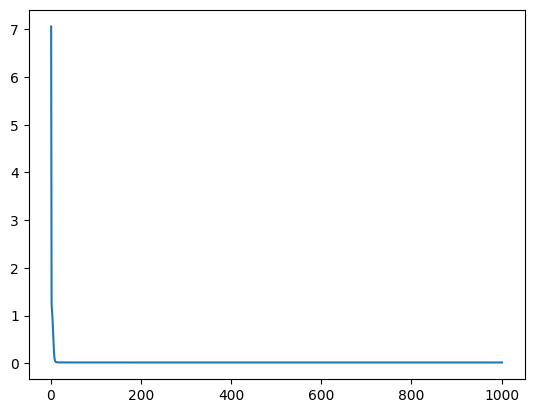

In [ ]:
plt.plot([x for x in range(1, len(loss_history)+1)], loss_history)

## Last 10 loss history

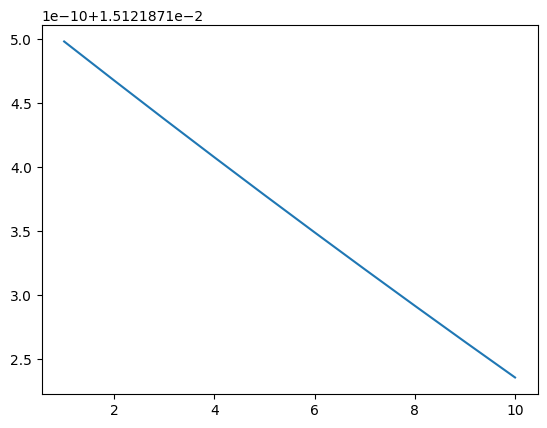

In [ ]:
plt.plot([x for x in range(1, 11)], loss_history[-10:])

In [ ]:
H.T

array([[1.00382143e+000, 3.28961302e-001, 5.48158119e-004],
       [7.24479363e-272, 4.04233490e-007, 8.70749098e-001],
       [3.34944113e-002, 1.31279233e+000, 3.09849396e-003],
       [3.00803524e-001, 7.35923994e-001, 4.60300546e-001]])

In [ ]:
import copy

results = copy.deepcopy(H.T)
for i in range(len(results)):
  row = results[i]
  argmx = np.argmax(row)
  row = [1 if t == argmx else 0 for t in range(len(row))]
  results[i] = row
results

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [ ]:
for idx, text in enumerate(corpus):
  print(text, ": Topic "+str(np.argmax(results[idx]) + 1))

ball ball ball planet galaxy : Topic 1
referendum planet planet referendum referendum : Topic 3
planet planet galaxy planet ball : Topic 2
planet galaxy referendum planet ball : Topic 2


## Considering that Topic 2 = Science, Topic 3 = Politics, Topic 1 = Sports,Astronomy; these results are 100% CORRECT!!!!!!

## Topic Modelling for BBC News with Non-Negative Matrix Factorization

In [ ]:
numberoftopics = 5

In [ ]:
all_articles = concat(articles_b, articles_e, articles_p, articles_t, articles_s)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

# TD-IDF Matrix
X = vectorizer.fit_transform(all_articles)

# extracting feature names
tfidf_tokens = vectorizer.get_feature_names_out()

In [ ]:
# A is term-document matrix
A = X.T.toarray()
A.shape

(29418, 2224)

In [ ]:
W = np.random.random((len(tfidf_tokens), numberoftopics))
print(W.shape)

(29418, 5)


In [ ]:
H = np.random.random((numberoftopics, len(all_articles)))
print(H.shape)

(5, 2224)


In [ ]:
# TAKES FOREVER TO FINISH THIS IS WHY COMMENTED OUT

#W, H, loss_history = nmf_train(A, W, H, 1)

## We need an optimization to work with Big Data

In [ ]:
@njit(parallel=True)
def loss_nmf(A, W, H):
  wh = np.dot(W, H)

  return np.sum(np.square(A - wh))

In [ ]:
@njit(nopython=True)
def nmf_train_optimized(A, W, H, EPOCHS):
  history = []
  for i in range(EPOCHS):
    history.append(loss_nmf(A, W, H))

    ah  = np.dot(A, H.T)

    wh  = np.dot(W, H)
    whh = np.dot(wh, H.T)
    for i in range(len(W)):
      for j in range(len(W[0])):
        oldw = W[i][j]
        W[i][j] = W[i][j] * ah[i][j] / whh[i][j]

        diff = W[i][j] - oldw

        wh[i] += diff * H[j]

        calculated_row = np.dot(wh[i], H.T)
        whh[i] = calculated_row

    wa  = np.dot(W.T, A)
    wtw = np.dot(W.T, W)
    wwh = np.dot(np.dot(W.T, W), H)
    for i in range(len(H)):
      for j in range(len(H[0])):
        oldh = H[i][j]
        H[i][j] = H[i][j] * wa[i][j] / wwh[i][j]

        for inneri in range(len(wwh)):
          wwh[inneri][j] -= oldh * wtw[inneri][i]
          wwh[inneri][j] += wtw[inneri][i] * H[i][j]

  history.append(loss_nmf(A, W, H))

  return (W, H, history)

/usr/local/lib/python3.10/dist-packages/numba/core/decorators.py:282: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)


In [ ]:
W, H, loss_history = nmf_train_optimized(A, W, H, 1500)

In [ ]:
loss_history

[1893.3791073844732,
 1893.3049074391156,
 1893.2382580568565,
 1893.1744960224623,
 1893.1062032752827,
 1893.0437671570814,
 1892.9882986809394,
 1892.930570256319,
 1892.8749879019597,
 1892.826933569968,
 1892.777440942733,
 1892.7259949034137,
 1892.6759321820564,
 1892.632968648623,
 1892.593854664061,
 1892.5588889412102,
 1892.528415124521,
 1892.4989534338654,
 1892.4662973786947,
 1892.4284966033626,
 1892.3925259326277,
 1892.36174288484,
 1892.3344779953363,
 1892.309664578269,
 1892.2854856162107,
 1892.260589648626,
 1892.2349901137425,
 1892.210204612204,
 1892.1871004699772,
 1892.165241026589,
 1892.1432799777667,
 1892.1202934555663,
 1892.09597927116,
 1892.0697825820218,
 1892.0424422326519,
 1892.018055868185,
 1891.9979606982693,
 1891.980414863581,
 1891.9648743680852,
 1891.9503823173513,
 1891.9363299742818,
 1891.9224381765048,
 1891.909576755102,
 1891.898076261522,
 1891.8872979518205,
 1891.8764850796967,
 1891.8649597319497,
 1891.8534276348018,
 1891.8428

## **119** **million** to **1891** loss is great improvement!

In [ ]:
print(int(loss_history[0]), "=>", int(loss_history[-1]))

1893 => 1891


In [ ]:
plt.plot(loss_history[1:100])

Error in callback <function _draw_all_if_interactive at 0x7c7bdb5b2200> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
import copy

results = copy.deepcopy(H.T)
for i in range(len(results)):
  row = results[i]
  argmx = np.argmax(row)
  row = [1 if t == argmx else 0 for t in range(len(row))]
  results[i] = row
results

## Clear the result_dict left from LDA

In [ ]:
result_dict = dict()

In [ ]:
for idx, text in enumerate(all_articles):
  result_dict[text] = np.argmax(results[idx])

In [ ]:
for idx, text in enumerate(all_articles[:3]):
  print(text, ": Topic "+str(np.argmax(results[idx]) + 1))

Ad sales boost Time Warner profit

Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.

The firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.

Time Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL's underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to sign up AOL

In [ ]:
W

array([[8.68636777e-005, 4.81627691e-005, 8.03512460e-005,
        8.83931117e-005, 6.23888317e-005],
       [2.12518691e-003, 3.08030085e-003, 6.72415685e-003,
        4.62047589e-074, 1.22029204e-002],
       [0.00000000e+000, 1.01744573e-005, 3.94622402e-005,
        1.80239951e-005, 7.93770204e-006],
       ...,
       [1.09308686e-004, 0.00000000e+000, 2.32210854e-322,
        1.86520519e-005, 1.00028434e-005],
       [8.14155932e-005, 0.00000000e+000, 0.00000000e+000,
        3.52151706e-004, 0.00000000e+000],
       [6.13058964e-004, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 1.54170774e-305]])

In [ ]:
import copy

resultsforw = []
copyW = copy.deepcopy(W)
for i in range(len(copyW)):
  row = copyW[i]
  val = np.max(row)
  resultsforw.append([val if t == np.argmax(row) else 0 for t in range(len(row))])

In [ ]:
resultsforw[:10]

[[0, 0, 0, 8.839311169671491e-05, 0],
 [0, 0, 0, 0, 0.012202920424488607],
 [0, 0, 3.946224018321266e-05, 0, 0],
 [0, 0, 0, 0, 7.271695677842404e-05],
 [0, 0, 0, 0.002158720314597022, 0],
 [0, 0, 9.155752862308971e-05, 0, 0],
 [0.00042226818555576206, 0, 0, 0, 0],
 [0, 0.00011032306402961617, 0, 0, 0],
 [0, 5.5161532014808085e-05, 0, 0, 0],
 [7.744623637023917e-05, 0, 0, 0, 0]]

In [ ]:
print(f"({len(resultsforw)},{len(resultsforw[0])})", tfidf_tokens.shape)

(29418,5) (29418,)


In [ ]:
word_dict = dict()
for idx, word in enumerate(tfidf_tokens):
  word_dict[word] = resultsforw[idx]
word_dict[tfidf_tokens[0]]

[0, 0, 0, 8.839311169671491e-05, 0]

In [ ]:
for i in range(numberoftopics):
  sorted_topic = list(tfidf_tokens)
  sorted_topic.sort(key=lambda x: word_dict[x][i], reverse=True)
  print("Topic "+str(i),":",", ".join(sorted_topic[:30]))

Topic 0 : film, best, awards, award, her, she, actor, oscar, won, actress, festival, films, director, star, aviator, comedy, who, prize, nominations, nominated, oscars, british, ceremony, named, album, show, movie, band, top, ray
Topic 1 : mr, he, labour, blair, election, brown, party, would, howard, government, minister, tax, chancellor, prime, tory, tories, leader, lib, campaign, plans, told, kennedy, tony, britain, public, general, secretary, liberal, lord, say
Topic 2 : to, and, that, is, are, it, people, be, mobile, they, for, will, music, as, more, can, technology, or, digital, phone, users, you, their, software, not, net, broadband, microsoft, use, which
Topic 3 : we, his, but, england, was, game, have, with, win, against, after, wales, cup, my, team, ireland, play, match, side, had, players, club, first, injury, him, out, coach, rugby, back, me
Topic 4 : the, in, of, us, its, growth, economy, said, year, bank, by, sales, on, has, economic, oil, 2004, market, prices, china, from

In [ ]:
find_max_accuracy()

Maximum Accuracy: 90.55785512699906%
Best Topics: [[0, 'e'], [1, 'p'], [2, 't'], [3, 's'], [4, 'b']]


0.9055785512699907

e = Entertainment </br>
p = Politics </br>
t = Technology </br>
s = Sports </br>
b = Business </br>

# **90**% ACCURACY WITH 1400 ITERATIONS!!!!!!

Time took : ~1 hour for 1400 iterations

# **87**% ACCURACY WITH ONLY 100 ITERATIONS!!!!!!!!!!!!!!!!!!!

Time took : 4 mins </br>
But unoptimized version took 80+ minutes(I don't know exactly because I had to stop it) even for ONE iteration
And even the matrix A has more than **65 million** entries, matrix multiplication of this would require **billions** of mathematical operation

In [ ]:
find_max_accuracy()

Maximum Accuracy: 90.55785512699906%
Best Topics: [[0, 'e'], [1, 'p'], [2, 't'], [3, 's'], [4, 'b']]


0.9055785512699907

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_true = []
for key in check_dict:
  y_true.append(check_dict[key])
y_true[::200]

['b', 'b', 'b', 'e', 'e', 'p', 'p', 't', 't', 's', 's']

In [ ]:
y_pred = []
for key in check_dict:
  y_pred.append(translation_dict[result_dict[key]])
y_pred[::200]

['b', 'b', 'b', 'e', 'e', 'p', 'p', 't', 't', 's', 's']

In [ ]:
print(classification_report(y_true, y_pred, target_names=["b", "e", "p", "t", "s"]))

              precision    recall  f1-score   support

           b       0.94      0.87      0.90       503
           e       0.95      0.82      0.88       369
           p       0.89      0.84      0.86       403
           t       0.95      0.98      0.97       504
           s       0.75      0.95      0.84       347

    accuracy                           0.90      2126
   macro avg       0.90      0.89      0.89      2126
weighted avg       0.90      0.90      0.90      2126

